In [4]:
import keras
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
keras.__version__
from keras.applications import VGG16
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras import regularizers
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
from PIL import ImageFile
import pandas as pd
import keras
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
ImageFile.LOAD_TRUNCATED_IMAGES = True
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.vis_utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

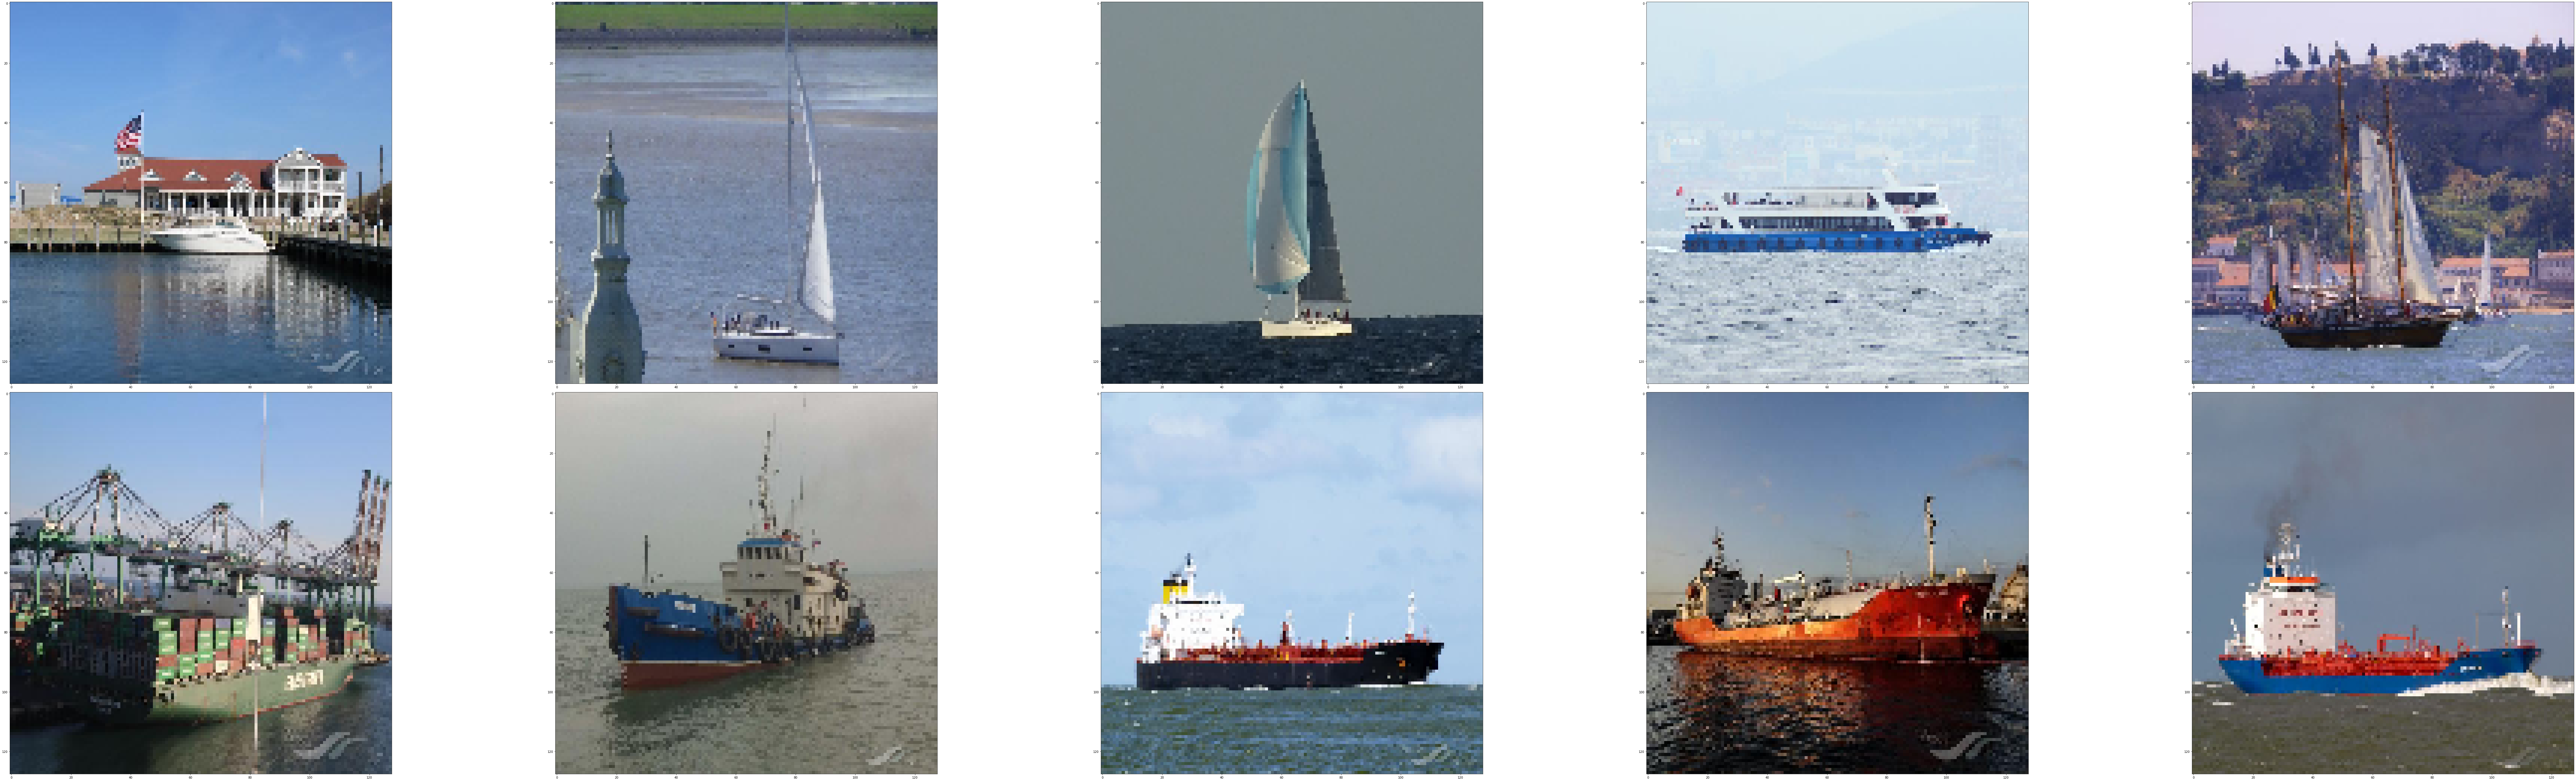

In [5]:
# size of the image: 48*48 pixels
pic_size = 128

# input path for the images
base_dir = "/home/jose/Desktop/ship_dataset_6500_1000_625_yacht_tanker/"

plt.figure(0, figsize=(pic_size,pic_size))
cpt = 0

for expression in os.listdir(base_dir + "validation/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_dir + "validation/" + expression + "/" +os.listdir(base_dir + "validation/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [6]:
for expression in os.listdir(base_dir + "validation"):
    print(str(len(os.listdir(base_dir + "validation/" + expression))) + " " + expression + " ship_dataset")

1000 yacht ship_dataset
1000 tanker ship_dataset


In [7]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [73]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 1

model = Sequential() 
model.add(Conv2D(32, kernel_size = (3, 3), input_shape=(pic_size, pic_size, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024)) 
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes)) 
model.add(Activation('sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['acc'])


# model = Sequential()
# model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())

# model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())

# model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())

# model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())

# model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())

# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# #model.add(Dropout(0.3))
# model.add(Dense(2, activation = 'softmax'))

In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
activation_32 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 61, 61, 128)       36992     
_________________________________________________________________
activation_33 (Activation)   (None, 61, 61, 128)       0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 30, 30, 128)       0         
__________

In [77]:
# number of images to feed into the NN for every batch
batch_size = 128
# number of epochs to train the NN
epochs = 100
#max plot test sample
num_of_train_samples = 13000

num_of_test_samples = 2000


train_datagen = ImageDataGenerator(rescale = 1. / 255, 
                 shear_range = 0.2, 
                  zoom_range = 0.2, 
            horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(pic_size, pic_size),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(pic_size, pic_size),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False)

Found 13000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [78]:

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("own_model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#history = model.fit_generator(generator=train_generator,
 #                               steps_per_epoch=train_generator.n//train_generator.batch_size,
  #                              epochs=epochs,
   #                             validation_data = validation_generator,
    #                            validation_steps = validation_generator.n//validation_generator.batch_size,
     #                           callbacks=callbacks_list
      #                          )

#history = model.fit_generator(train_generator,
 #                   steps_per_epoch=num_of_train_samples // batch_size,
  #                  epochs=epochs,
   #                 validation_data=validation_generator,
    #                validation_steps=num_of_test_samples // batch_size,
     #               callbacks=callbacks_list)
        
history = model.fit_generator(train_generator,
                    steps_per_epoch=num_of_train_samples // batch_size ,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_of_test_samples // batch_size,
                    callbacks=callbacks_list)



Epoch 1/100
101/101 [==============================] - 343s 3s/step - loss: 0.4045 - acc: 0.8134 - val_loss: 0.3878 - val_acc: 0.8125

Epoch 00001: val_acc improved from -inf to 0.81250, saving model to own_model.h5
Epoch 2/100
101/101 [==============================] - 326s 3s/step - loss: 0.3271 - acc: 0.8634 - val_loss: 0.3196 - val_acc: 0.8681

Epoch 00002: val_acc improved from 0.81250 to 0.86806, saving model to own_model.h5
Epoch 3/100
101/101 [==============================] - 324s 3s/step - loss: 0.2980 - acc: 0.8770 - val_loss: 0.2941 - val_acc: 0.8755

Epoch 00003: val_acc improved from 0.86806 to 0.87553, saving model to own_model.h5
Epoch 4/100
101/101 [==============================] - 323s 3s/step - loss: 0.2885 - acc: 0.8789 - val_loss: 0.3115 - val_acc: 0.8627

Epoch 00004: val_acc did not improve from 0.87553
Epoch 5/100
101/101 [==============================] - 311s 3s/step - loss: 0.2624 - acc: 0.8951 - val_loss: 0.2411 - val_acc: 0.9038

Epoch 00005: val_acc impro


Epoch 00042: val_acc did not improve from 0.95940
Epoch 43/100
101/101 [==============================] - 289s 3s/step - loss: 0.0920 - acc: 0.9658 - val_loss: 0.1694 - val_acc: 0.9359

Epoch 00043: val_acc did not improve from 0.95940
Epoch 44/100
101/101 [==============================] - 288s 3s/step - loss: 0.0870 - acc: 0.9689 - val_loss: 0.1356 - val_acc: 0.9487

Epoch 00044: val_acc did not improve from 0.95940
Epoch 45/100
101/101 [==============================] - 289s 3s/step - loss: 0.0929 - acc: 0.9674 - val_loss: 0.1113 - val_acc: 0.9589

Epoch 00045: val_acc did not improve from 0.95940
Epoch 46/100
101/101 [==============================] - 289s 3s/step - loss: 0.0903 - acc: 0.9664 - val_loss: 0.1449 - val_acc: 0.9471

Epoch 00046: val_acc did not improve from 0.95940
Epoch 47/100
101/101 [==============================] - 288s 3s/step - loss: 0.0863 - acc: 0.9686 - val_loss: 0.1218 - val_acc: 0.9562

Epoch 00047: val_acc did not improve from 0.95940
Epoch 48/100
101/10

KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10);
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

NameError: name 'history' is not defined

In [1]:
# predictions = model.predict_generator(validation_generator,  num_of_test_samples // batch_size+1 )
# y_pred = [np.argmax(probas) for probas in predictions]
# y_test = validation_generator.classes
# class_names = validation_generator.class_indices.keys()
# class_values = validation_generator.class_indices.values()
# print(class_names)
# print(class_values)

import keras.utils.Sequence

predictions = model.predict_generator(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()


Using TensorFlow backend.


ModuleNotFoundError: No module named 'keras.utils.Sequence'

In [66]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2000, 1936]

In [40]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(pic_size, pic_size),
        batch_size=batch_size,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 2000 images belonging to 2 classes.
test acc: 0.9562182741116751


In [59]:
from keras.models import load_model
import cv2
import numpy as np
from keras.preprocessing import image
import operator
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

img = cv2.imread('AL NABILA 5.jpg')
img = cv2.resize(img,(pic_size,pic_size))
img = np.reshape(img,[1,pic_size,pic_size,3])

classes = model.predict_classes(img)
predictions = model.predict(img)

print(classes[0])


[0]


In [60]:
import cv2

orig = cv2.imread(predict_image_path)
cv2.putText(orig, "Predicted: {}({:.2f})%".format(getKeysByValue(predicted_class_indices, max_predict)[0], max(value) *100), (10, 30),
                cv2.FONT_HERSHEY_PLAIN, 1.5, (43, 99, 255), 2)

cv2.imshow("Classification", orig)
cv2.waitKey(10000)
cv2.destroyAllWindows()